<a href="https://colab.research.google.com/github/QuratAkhter/GenAI/blob/main/GenAI_Text_Classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df = df.iloc[:10000]

In [6]:
df.shape

(10000, 2)

In [7]:
df['sentiment'].value_counts()

,count
sentiment,
positive,5028
negative,4972


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='count', ylabel='sentiment'>

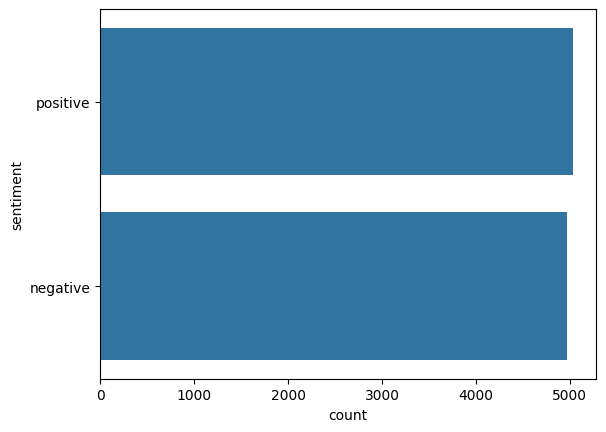

In [9]:
sns.countplot(df['sentiment'])

In [10]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
df.isnull().sum()

,0
review,0
sentiment,0


In [12]:
df.duplicated().sum()

np.int64(17)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

# Basic Preprocessing
1. Remove HTML Tags
2. Lower casing
3. Remove stopwords

In [15]:
import re

In [16]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [17]:
df['review'] = df['review'].apply(remove_html_tags)

In [18]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [19]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [20]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [21]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw_list = stopwords.words('english')
print(sw_list)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def remove_stopwords(text):
  new_text = []
  words = text.split()
  for word in words:
    if word not in sw_list:
      new_text.append(word)
  return " ".join(new_text)


In [23]:
df['review'] = df['review'].apply(remove_stopwords)

In [24]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


In [25]:
X = df.drop('sentiment', axis=1)
y = df['sentiment']

In [26]:
X.shape

(9983, 1)

In [27]:
y.shape

(9983,)

In [28]:
X.head()

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production. filming technique...
2,thought wonderful way spend time hot summer we...
3,basically there's family little boy (jake) thi...
4,"petter mattei's ""love time money"" visually stu..."


In [29]:
y.head()

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive


In [30]:
y = y.map({'positive':1, 'negative':0})

In [31]:
y

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
9995,1
9996,0
9997,0
9998,0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2, stratify=y)

In [33]:
X_test.shape

(1997, 1)

In [34]:
X_train.shape

(7986, 1)

In [66]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [67]:
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [68]:
# Training model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()


In [69]:
model.fit(X_train_bow, y_train)
y_pred = model.predict(X_test_bow)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)

0.6184276414621933

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65       992
           1       0.65      0.53      0.58      1005

    accuracy                           0.62      1997
   macro avg       0.62      0.62      0.62      1997
weighted avg       0.62      0.62      0.62      1997



In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf_model = RandomForestClassifier()

In [74]:
rf_model.fit(X_train_bow,y_train)

RandomForestClassifier()

In [75]:
y_pred = rf_model.predict(X_test_bow)

In [76]:
accuracy_score(y_test, y_pred)

0.8312468703054582

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       992
           1       0.84      0.83      0.83      1005

    accuracy                           0.83      1997
   macro avg       0.83      0.83      0.83      1997
weighted avg       0.83      0.83      0.83      1997



In [78]:
# Using minimum fixed direction

cv = CountVectorizer(max_features=3000)
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf_model = RandomForestClassifier()

rf_model.fit(X_train_bow, y_train)
y_pred = rf_model.predict(X_test_bow)

accuracy_score(y_test, y_pred)

0.8257386079118678

# N-Gram

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
cv = CountVectorizer(ngram_range=(2,2), )
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()



In [ ]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train_bow, y_train)


In [ ]:
y_pred = rf_model.predict(X_test_bow)

accuracy_score(y_test, y_pred)

# TF-IDF

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf = TfidfVectorizer()

In [37]:
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review']).toarray()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
rf = RandomForestClassifier()

In [40]:
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [41]:
y_pred = rf.predict(X_test_tfidf)

In [42]:
accuracy_score(y_test, y_pred)

0.8342513770655984

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       992
           1       0.85      0.82      0.83      1005

    accuracy                           0.83      1997
   macro avg       0.83      0.83      0.83      1997
weighted avg       0.83      0.83      0.83      1997



# Word2Vec

In [47]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 46.0 MB/s eta 0:00:00


In [48]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

In [49]:
w2v = Word2Vec(window=10, min_count=2)

In [50]:
w2v.build_vocab(X_train['review'].apply(simple_preprocess))

In [52]:
w2v.train(X_train['review'], total_examples=w2v.corpus_count, epochs=w2v.epochs)

(0, 35058570)

In [53]:
def sentence_vector(sentence, model):
    vectors = [
        model.wv[word] for word in sentence
        if word in model.wv
    ]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

In [54]:
X_train_w2v = np.array([sentence_vector(s, w2v) for s in X_train['review']])
X_test_w2v = np.array([sentence_vector(s, w2v) for s in X_test['review']])



In [55]:
rf = RandomForestClassifier()
rf.fit(X_train_w2v, y_train)


RandomForestClassifier()

In [56]:
y_pred = rf.predict(X_test_w2v)

In [57]:
accuracy_score(y_test, y_pred)

0.5032548823234853